In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('field.dat', sep=";", header=None, dtype='float64')
df = df.dropna(axis=1)
df.head(n=3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.000000,-8.758640e-17,2.082870e-16,3.308960e-16,1.426170e-16,-4.199000e-16,3.254900e-16,2.980300e-16,-1.885980e-17,2.268140e-16,...,-2.268000e-16,1.889470e-17,-2.980460e-16,-3.255620e-16,4.199180e-16,-1.425560e-16,-3.308860e-16,-2.083470e-16,8.748370e-17,-8.470110e-20
1,0.029758,2.975260e-02,2.973480e-02,2.970520e-02,2.966360e-02,2.960990e-02,2.954390e-02,2.946550e-02,2.937450e-02,2.927050e-02,...,2.927040e-02,2.937450e-02,2.946550e-02,2.954390e-02,2.960990e-02,2.966360e-02,2.970520e-02,2.973480e-02,2.975260e-02,2.975850e-02
2,0.059505,5.949330e-02,5.945780e-02,5.939860e-02,5.931560e-02,5.920830e-02,5.907660e-02,5.892010e-02,5.873820e-02,5.853050e-02,...,5.853050e-02,5.873820e-02,5.892010e-02,5.907660e-02,5.920830e-02,5.931550e-02,5.939860e-02,5.945780e-02,5.949330e-02,5.950510e-02


In [29]:
from sklearn.preprocessing import normalize

image_size = df.shape[0]
images = []
ind = 0
while ind < df.shape[0]:
    images.append(normalize(df.values[ind:(ind+image_size), :]))
    ind += image_size
    
len(images), np.max(images), np.min(images)

(1, 0.9744433834269477, -0.9744372175950269)

In [19]:
fig, axes = plt.subplots(ncols=len(images) // 2, nrows=2, sharex='col', sharey='row')

mpl.rcParams['figure.figsize'] = (20, 10)

for ax, img in zip(axes.flatten(), images):
    ax.imshow((1./(np.log(1. + np.max(images))))*np.log(1. + img))

plt.show()

<Figure size 1440x720 with 0 Axes>

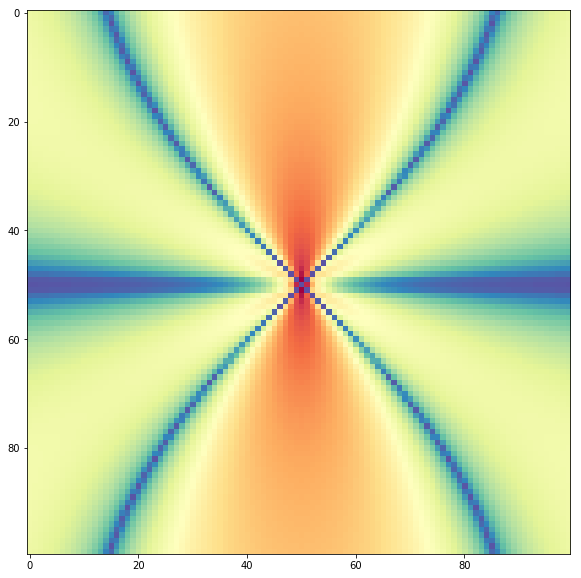

In [43]:
magic_img = (255./(np.log(1. + 255.*np.max(np.abs(images[0])))))*np.log(1. + 255.*np.abs(images[0]))

plt.imshow(magic_img[50:150, 50:150],
           cmap=plt.cm.Spectral_r)
plt.savefig('stess_field.png', dpi=100)

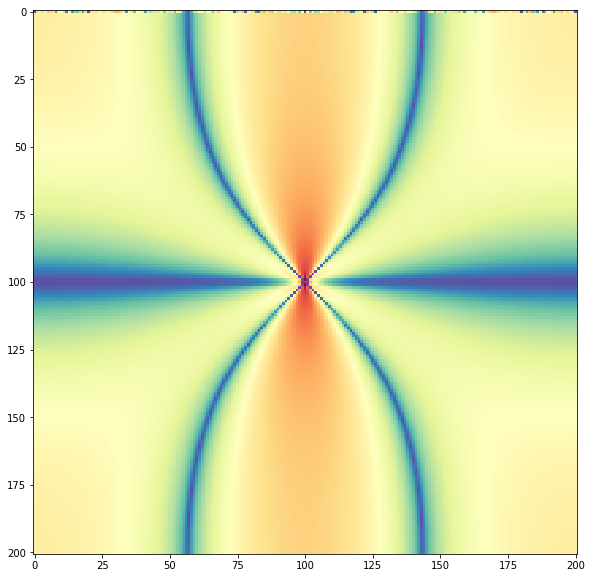

In [44]:
plt.imshow(magic_img, cmap=plt.cm.Spectral_r)
plt.savefig('stess_field_orig.png', dpi=100)